# Étape 1: Extraction des données
Tout d'abord, extrayez les données nécessaires de votre base de données en utilisant pandas et pyodbc

In [1]:
import pyodbc
import pandas as pd

# Paramètres de connexion
server = 'DESKTOP-JK6D8G9\SQLEXPRESS' 
database = 'MV' 
trusted_Connection='yes'

# Chaîne de connexion
conn_str = (
    f'DRIVER={{SQL Server}};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'Trusted_Connection ={trusted_Connection} '
)

# Connexion à la base de données
conn = pyodbc.connect(conn_str)

# Chargement des données de la table Maison
query = "SELECT IdMaison, Ville, Commune, Quartier, Nombre_de_pieces, Nombre_de_chambres, Nombre_de_salles_de_bain, metre_carre, Descriptions, Type_de_maison, Prix_unitaire FROM Maison"
maison_data = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()


C:\Users\HPC\AppData\Local\Temp\ipykernel_14996\2934454662.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  maison_data = pd.read_sql(query, conn)


# Étape 2: analyser les données

In [2]:
# Affichage des premières lignes des données chargées
maison_data

,IdMaison,Ville,Commune,Quartier,Nombre_de_pieces,Nombre_de_chambres,Nombre_de_salles_de_bain,metre_carre,Descriptions,Type_de_maison,Prix_unitaire
0,304,Abidjan,Cocody,Angré,5,3,2,200.0,Villa de luxe avec piscine et jardin,Villa,120000000.0
1,305,San-Pédro,Bardot,Zone Industrielle,4,3,2,180.0,Maison spacieuse proche du port,Maison,95000000.0
2,306,Bouaké,Ahougnansou,Belleville,3,2,1,150.0,Maison moderne avec jardin,Maison,85000000.0
3,307,Yamoussoukro,Kokrenou,Quartier Présidentiel,4,3,2,220.0,Grande villa avec garage et piscine,Villa,115000000.0
4,308,Daloa,Gbatta,Quartier Résidentiel,2,1,1,100.0,Petit appartement rénové,Appartement,65000000.0
...,...,...,...,...,...,...,...,...,...,...,...
195,499,Man,Bangolo,Quartier Central,4,3,2,160.0,Maison avec vue sur les montagnes,Maison,125000000.0
196,500,Gagnoa,Bracodi,Quartier Administratif,5,4,3,220.0,Grande villa avec piscine et jardin,Villa,180000000.0
197,501,Korhogo,Nafoun,Quartier Industriel,3,2,1,140.0,Maison moderne avec terrasse,Maison,110000000.0
198,502,San-Pédro,Loba,Quartier Industriel,4,3,2,160.0,Maison spacieuse avec jardin,Maison,140000000.0


In [3]:
df = maison_data.copy()
dfp = maison_data.copy()

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IdMaison                  200 non-null    int64  
 1   Ville                     200 non-null    object 
 2   Commune                   200 non-null    object 
 3   Quartier                  200 non-null    object 
 4   Nombre_de_pieces          200 non-null    int64  
 5   Nombre_de_chambres        200 non-null    int64  
 6   Nombre_de_salles_de_bain  200 non-null    int64  
 7   metre_carre               200 non-null    float64
 8   Descriptions              200 non-null    object 
 9   Type_de_maison            200 non-null    object 
 10  Prix_unitaire             200 non-null    float64
dtypes: float64(2), int64(4), object(5)
memory usage: 17.3+ KB


In [5]:
# Vérifier s'il y a des données manquantes par colonne
donnees_colonne = df.isna().any()
donnees_colonne

IdMaison                    False
Ville                       False
Commune                     False
Quartier                    False
Nombre_de_pieces            False
Nombre_de_chambres          False
Nombre_de_salles_de_bain    False
metre_carre                 False
Descriptions                False
Type_de_maison              False
Prix_unitaire               False
dtype: bool

In [6]:
# Vérifier s'il y a des données manquantes par ligne
donnees_ligne = df.isna().any(axis=1)
donnees_ligne

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [7]:
# Vérifier s'il y a des données redondante par ligne
dupliquees = df.duplicated().sum()
dupliquees

0

In [8]:
import matplotlib.pyplot as plt

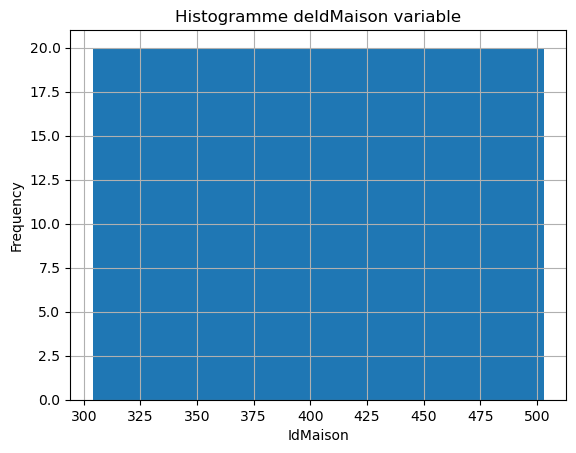

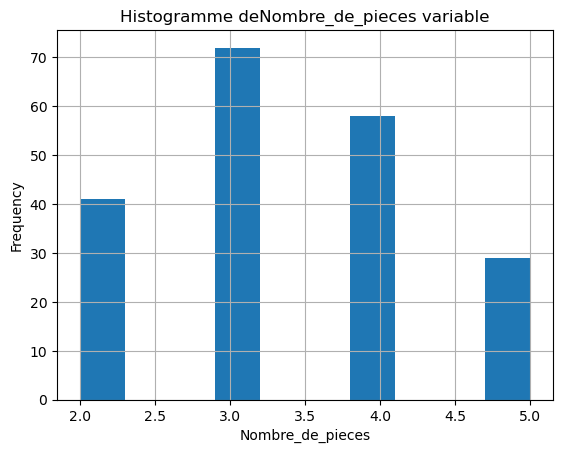

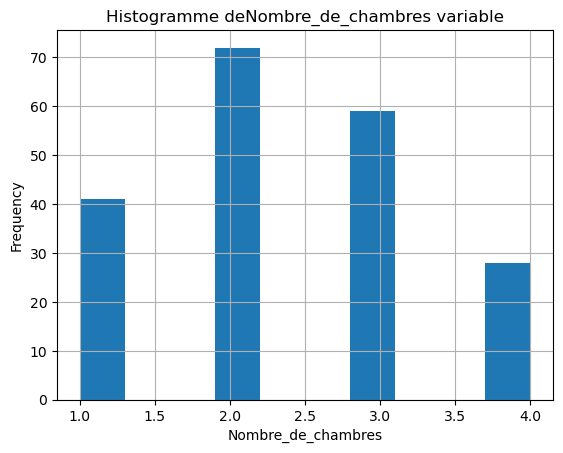

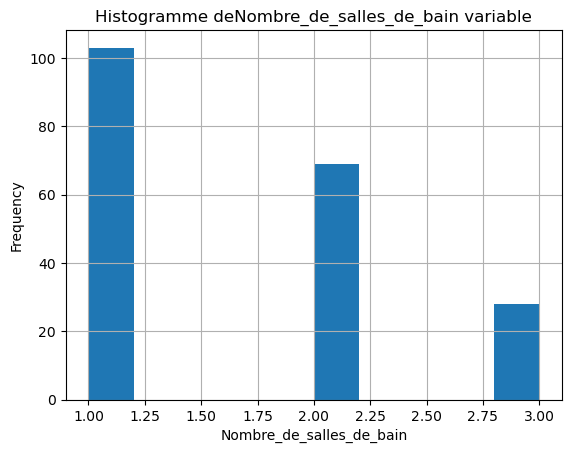

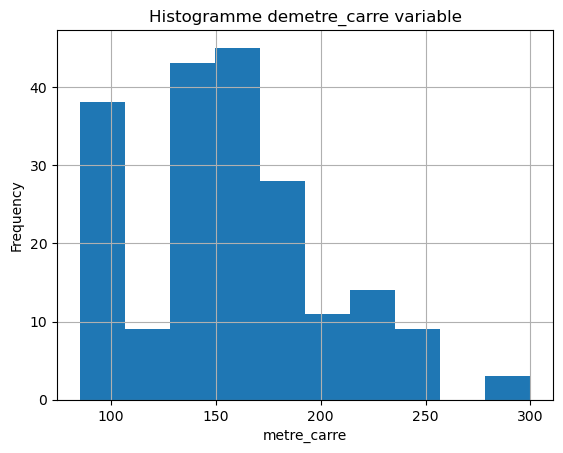

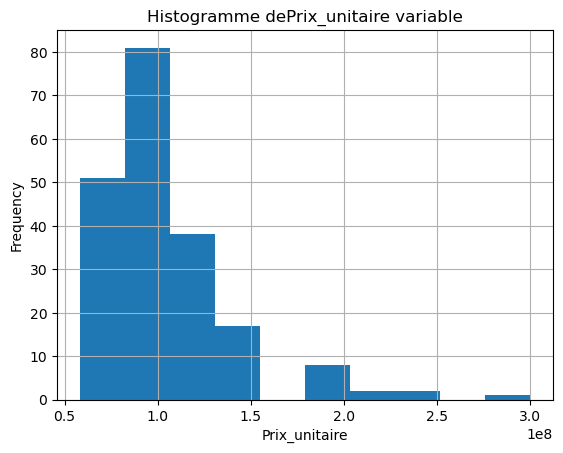

In [9]:

# afficher la représentation graphique de chaque variable quantitative
liste_quant = list(df.select_dtypes(exclude=object))

for var in liste_quant:
    df[var].hist()
    plt.title('Histogramme de' + var + ' variable')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

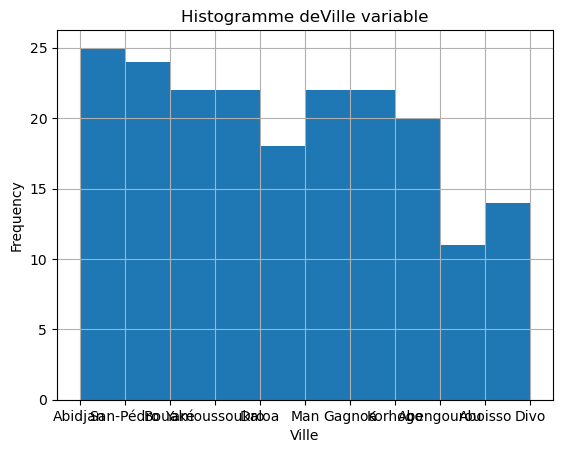

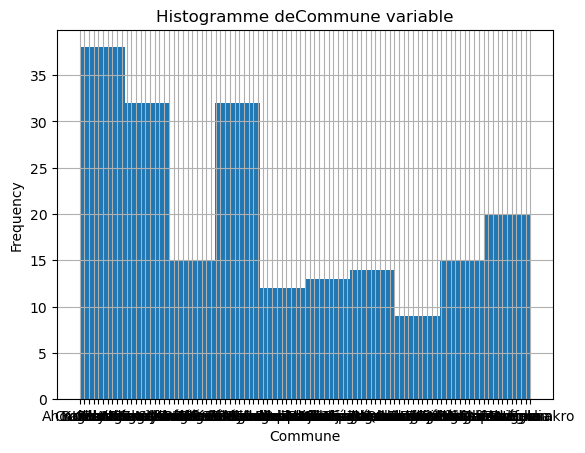

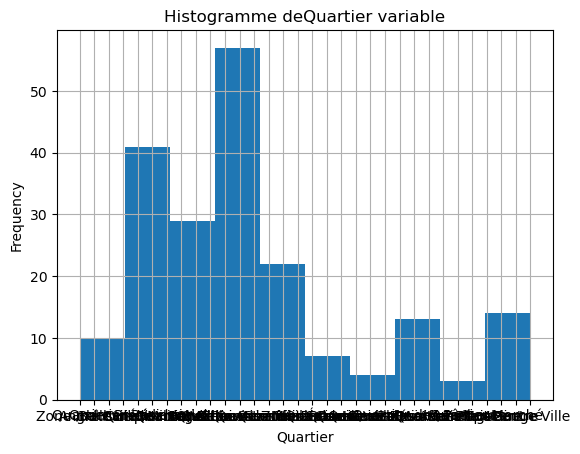

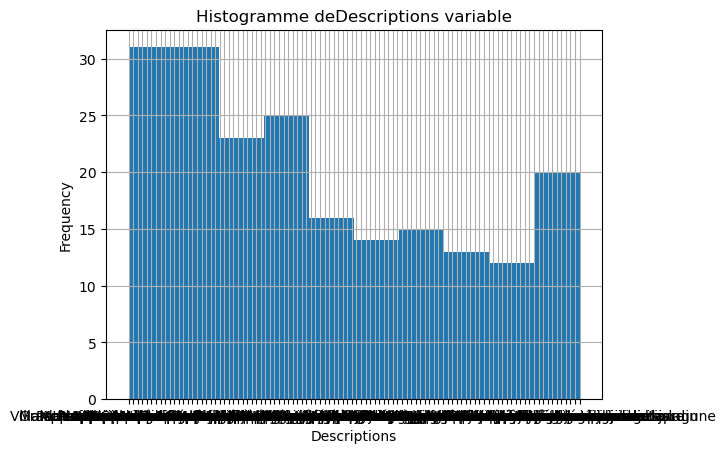

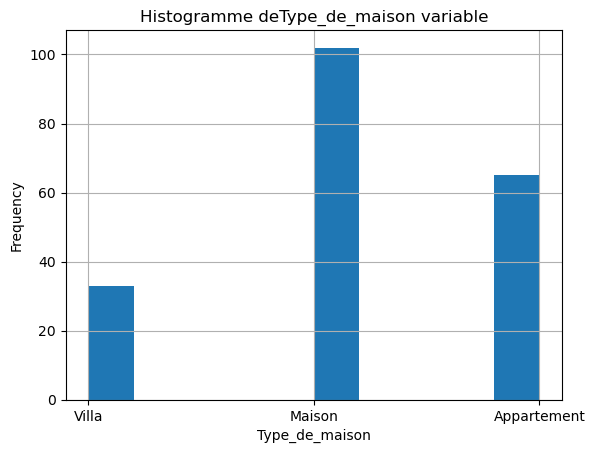

In [10]:
# afficher la représentation graphique de chaque variable qualitatif
liste_qual = list(df.select_dtypes(include=object))

for var in liste_qual:
    df[var].hist()
    plt.title('Histogramme de' + var + ' variable')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Étape 2: Préparation des données
Nettoyez et préparez les données pour l'entraînement du modèle. Cela inclut la gestion des valeurs manquantes, la conversion des variables catégorielles en variables numériques et l'encodage des descriptions textuelles.

In [11]:

# Conversion des variables catégorielles en variables numériques
colonn = df[['Ville', 'Commune', 'Quartier', 'Type_de_maison',]]
def recodage_total(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype('category')
            df[col] = df[col].cat.codes
    return df
data_categorical = recodage_total(colonn)

# Joindre les colonnes recodées avec les autres colonnes non catégorielles
data = df[['Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre', 'Descriptions', 'Prix_unitaire']].join(data_categorical)

# Encodage des descriptions textuelles
from sklearn.feature_extraction.text import TfidfVectorizer

# Encodage des descriptions textuelles
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(data['Descriptions'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
data = data.drop('Descriptions', axis=1).join(tfidf_df)

# Sauvegarder les colonnes originales après le prétraitement
original_columns = data.columns

# Séparation des caractéristiques et de la variable cible
X = data.drop('Prix_unitaire', axis=1)
y = data['Prix_unitaire']


C:\Users\HPC\AppData\Local\Temp\ipykernel_14996\3561598588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
C:\Users\HPC\AppData\Local\Temp\ipykernel_14996\3561598588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.codes
C:\Users\HPC\AppData\Local\Temp\ipykernel_14996\3561598588.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [12]:
data

,Nombre_de_pieces,Nombre_de_chambres,Nombre_de_salles_de_bain,metre_carre,Prix_unitaire,Ville,Commune,Quartier,Type_de_maison,appartement,...,rénové,situé,spacieuse,spacieux,sur,terrasse,villa,ville,vue,écoles
0,5,3,2,200.0,120000000.0,1,26,0,2,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.359917,0.0,0.00000,0.0
1,4,3,2,180.0,95000000.0,9,14,29,1,0.000000,...,0.000000,0.0,0.501285,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
2,3,2,1,150.0,85000000.0,3,5,1,1,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
3,4,3,2,220.0,115000000.0,10,61,17,2,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.403637,0.0,0.00000,0.0
4,2,1,1,100.0,65000000.0,4,43,18,0,0.335947,...,0.781517,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,3,2,160.0,125000000.0,8,13,10,1,0.000000,...,0.000000,0.0,0.000000,0.0,0.417809,0.000000,0.000000,0.0,0.37844,0.0
196,5,4,3,220.0,180000000.0,6,23,7,2,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.431073,0.0,0.00000,0.0
197,3,2,1,140.0,110000000.0,7,73,12,1,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.687051,0.000000,0.0,0.00000,0.0
198,4,3,2,160.0,140000000.0,9,66,12,1,0.000000,...,0.000000,0.0,0.764883,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0


In [13]:
print(X)
print(y)

     Nombre_de_pieces  Nombre_de_chambres  Nombre_de_salles_de_bain  \
0                   5                   3                         2   
1                   4                   3                         2   
2                   3                   2                         1   
3                   4                   3                         2   
4                   2                   1                         1   
..                ...                 ...                       ...   
195                 4                   3                         2   
196                 5                   4                         3   
197                 3                   2                         1   
198                 4                   3                         2   
199                 2                   1                         1   

     metre_carre  Ville  Commune  Quartier  Type_de_maison  appartement   au  \
0          200.0      1       26         0               2     0.00

# Étape 3: Division des données
Divisez les données en ensembles d'entraînement et de test.

In [14]:
#decoupage du dataset en variable d'entrenement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


In [32]:
X_test

,IdMaison,Ville,Commune,Quartier,Nombre_de_pieces,Nombre_de_chambres,Nombre_de_salles_de_bain,metre_carre,Descriptions,Type_de_maison
95,399,Man,Libreville,Quartier Militaire,2,1,1,95.0,Appartement avec vue sur montagne,Appartement
15,319,Man,Libreville,Quartier Militaire,2,1,1,110.0,Petit appartement avec vue sur la montagne,Appartement
30,334,Divo,Gogobro,Quartier Résidentiel,2,1,1,90.0,Maison près du marché,Maison
158,462,Daloa,Gblapleu,Centre Ville,5,4,3,220.0,Grande maison avec piscine,Villa
128,432,Yamoussoukro,Habitat,Quartier Résidentiel,3,2,1,150.0,Maison près de la basilique,Maison
115,419,Man,Louhiri,Quartier Militaire,2,1,1,90.0,Appartement avec vue sur montagne,Appartement
69,373,Aboisso,Abradine,Quartier des Affaires,5,4,3,230.0,Villa avec piscine et garage,Villa
170,474,Man,Bangolo,Quartier Central,4,3,2,160.0,Maison avec vue sur les montagnes,Maison
174,478,Yamoussoukro,Attiegouakro,Quartier Résidentiel,2,1,1,100.0,Petit appartement moderne,Appartement
45,349,Man,Zérégbo,Quartier Industriel,4,3,2,200.0,Maison avec grande cour,Maison


In [33]:
y_test

95      70000000.0
15      65000000.0
30      60000000.0
158    200000000.0
128    105000000.0
115     70000000.0
69     125000000.0
170    125000000.0
174     90000000.0
45      95000000.0
Name: Prix_unitaire, dtype: float64

In [15]:
# Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
X_train

array([[-1.46386811, -1.46789999, -0.87897713, ..., -0.14627009,
        -0.38839157, -0.12664425],
       [-1.46386811, -1.46789999, -0.87897713, ..., -0.14627009,
        -0.38839157, -0.12664425],
       [ 0.64321478,  0.65302015,  0.52443173, ..., -0.14627009,
        -0.38839157, -0.12664425],
       ...,
       [-0.41032667, -0.40743992, -0.87897713, ..., -0.14627009,
        -0.38839157, -0.12664425],
       [-0.41032667, -0.40743992, -0.87897713, ..., -0.14627009,
        -0.38839157,  7.98316846],
       [ 1.69675622,  1.71348022,  1.9278406 , ..., -0.14627009,
        -0.38839157, -0.12664425]])

# Étape 4: Entraînement de plusieurs modèles
Entraînons plusieurs modèles et évaluons leur performance.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

# Initialisation des modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

In [18]:
# Entraînement et évaluation des modèles
performance = {}

for nom, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calcul de la "précision" (accuracy) dans une tolérance de 10%
    accuracy = sum(abs(y_test - y_pred) <= 0.1 * y_test) / len(y_test)
    
    performance[nom] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy": accuracy}

# Affichage des performances
for nom, metrics in performance.items():
    print(f"{nom}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}, Accuracy = {metrics['Accuracy']}")

Linear Regression: MSE = 425820244087550.5, MAE = 18779677.018278815, R2 = 0.7342360779606487, Accuracy = 0.2
Random Forest: MSE = 85984219236111.11, MAE = 7453916.666666667, R2 = 0.9463353289211353, Accuracy = 0.8
Support Vector Regressor: MSE = 1632499547819012.8, MAE = 29499993.626676016, R2 = -0.01887941820503225, Accuracy = 0.3


# Étape 5: Sélection du meilleur modèle
Sélectionnons le modèle avec la meilleure performance en fonction de la métrique R² (plus la valeur est proche de 1, mieux c'est).

In [19]:
best_model_name = max(performance, key=lambda k: performance[k]['R2'])
best_model = models[best_model_name]

print(f"Best model is: {best_model_name} with R2 = {performance[best_model_name]['R2']}")


Best model is: Random Forest with R2 = 0.9463353289211353


In [20]:
# Calcul et affichage des prédictions correctes et incorrectes
correct_predictions = []
incorrect_predictions = []

threshold = 0.1  # 10%

for i in range(len(y_test)):
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    if abs(actual_value - predicted_value) <= threshold * actual_value:
        correct_predictions.append((actual_value, predicted_value))
    else:
        incorrect_predictions.append((actual_value, predicted_value))

print("\nCorrect Predictions:")
for actual, predicted in correct_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")

print("\nIncorrect Predictions:")
for actual, predicted in incorrect_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")


Correct Predictions:
Actual: 105000000.0, Predicted: 94999996.20600487
Actual: 90000000.0, Predicted: 94999983.1403878
Actual: 95000000.0, Predicted: 95000001.7056387

Incorrect Predictions:
Actual: 70000000.0, Predicted: 94999990.99004896
Actual: 65000000.0, Predicted: 94999989.70750974
Actual: 60000000.0, Predicted: 94999993.6968169
Actual: 200000000.0, Predicted: 95000009.36023776
Actual: 70000000.0, Predicted: 94999990.97307608
Actual: 125000000.0, Predicted: 95000009.23074657
Actual: 125000000.0, Predicted: 94999999.14972886


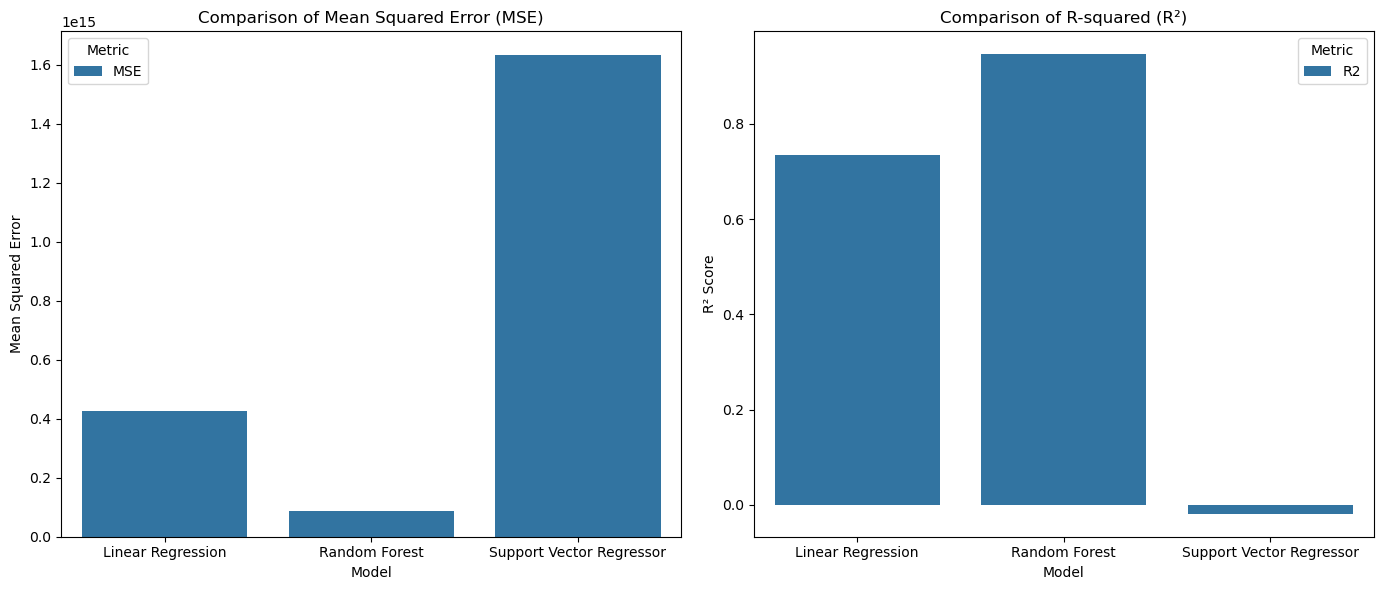

In [21]:
import seaborn as sns
# Préparation des données pour la visualisation
performance_df = pd.DataFrame(performance).T.reset_index().rename(columns={'index': 'Model'})
performance_df = performance_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

# Tracer le graphique
plt.figure(figsize=(14, 6))

# Graphique des MSE
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_df[performance_df['Metric'] == 'MSE'])
plt.title('Comparison of Mean Squared Error (MSE)')
plt.ylabel('Mean Squared Error')
plt.xlabel('Model')

# Graphique des R²
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Value', hue='Metric', data=performance_df[performance_df['Metric'] == 'R2'])
plt.title('Comparison of R-squared (R²)')
plt.ylabel('R² Score')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

# Étape 4: Utilisation du meilleur modèle
Utilisez le meilleur modèle pour faire des prédictions.

In [22]:
# Exemple de nouvelle maison à prédire
new_house = pd.DataFrame({
    'Nombre_de_pieces': [5],
    'Nombre_de_chambres': [3],
    'Nombre_de_salles_de_bain': [2],
    'metre_carre': [200],  # Exemple, à ajuster en fonction de vos données
    'Ville_Abidjan': [1],  # Exemple, à ajuster en fonction de vos données
    'Commune_Cocody': [26],  # Exemple, à ajuster en fonction de vos données
    'Quartier_Angré': [0],  # Exemple, à ajuster en fonction de vos données
    'Type_de_maison_Villa': [2],  # Exemple, à ajuster en fonction de vos données
})

# Ajouter des colonnes pour le TF-IDF
tfidf_new_house = tfidf.transform(['description of the house'])
tfidf_new_house_df = pd.DataFrame(tfidf_new_house.toarray(), columns=tfidf.get_feature_names_out())
new_house = new_house.join(tfidf_new_house_df)

# Reindex pour s'assurer que les colonnes correspondent
new_house = new_house.reindex(columns=original_columns.drop('Prix_unitaire'), fill_value=0)

# Standardisation des données
new_house = scaler.transform(new_house)

# Prédiction avec le meilleur modèle
predicted_price = best_model.predict(new_house)
print(f"Predicted Price: {predicted_price[0]}")


Predicted Price: 150654166.66666666


## Pipeline

Pour encapsuler l'ensemble du processus d'encodage, de transformation et de prédiction dans un pipeline, nous utiliserons Pipeline et ColumnTransformer de scikit-learn. Voici comment vous pouvez ajuster votre script :

Étape 1 : Importation des bibliothèques nécessaires
Étape 2 : Séparation des caractéristiques et de la variable ciblecatégorielles et textuelles.
Étape 3 : Préparation des transformateurs pour les colonnes catégorielles et textuelles
Étape 4 : Initialisation et entraînement des modèles
Étape 5 : Sélection du meilleur modèle et affichage des performances
Étape 6 : Création du pipeline complet pour le meilleur modèle
Étape 7 : Fonction pour prédire le prix d'une nouvelle maison

# Étape 1 : Importation des bibliothèques nécessaires

Explication :
Nous importons les bibliothèques nécessaires pour ncapsuler l'ensemble du processus d'encodage, de transformation et de prédiction dans un pipeline, nous utiliserons Pipeline et ColumnTransformer de scikit-learn.

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Étape 2 : Séparation des caractéristiques et de la variable cible

Explication :
Nous séparons les caractéristiques (features) de la variable cible (Prix_unitaire). X contient toutes les colonnes sauf Prix_unitaire, et y contient uniquement la colonne Prix_unitaire.

In [24]:
X = dfp.drop('Prix_unitaire', axis=1)
y = dfp['Prix_unitaire']

# Étape 3 : Préparation des transformateurs pour les colonnes catégorielles et textuelles

Explication :
Nous définissons les colonnes catégorielles, textuelles et numériques. ColumnTransformer est utilisé pour appliquer différentes transformations à différentes colonnes du DataFrame :

StandardScaler pour les colonnes numériques.
OneHotEncoder pour les colonnes catégorielles.
TfidfVectorizer pour la colonne textuelle Descriptions.

In [25]:
# Préparation du transformateur pour les colonnes catégorielles et textuelles
categorical_features = ['Ville', 'Commune', 'Quartier', 'Type_de_maison']
text_features = ['Descriptions']
numerical_features = ['Nombre_de_pieces', 'Nombre_de_chambres', 'Nombre_de_salles_de_bain', 'metre_carre']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('tfidf', TfidfVectorizer(max_features=100), 'Descriptions')
    ])

# Étape 4 : Initialisation et entraînement des modèles

Explication :
Nous initialisons trois modèles différents : Linear Regression, Random Forest Regressor et Support Vector Regressor. Pour chaque modèle, nous créons un pipeline complet qui inclut le préprocesseur et le modèle, divisons les données en ensembles d'entraînement et de test, entraînons le modèle, faisons des prédictions et évaluons les performances en utilisant plusieurs métriques (MSE, MAE, R², Accuracy).


In [26]:
# Initialisation des modèles
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Entraînement et évaluation des modèles
performance = {}

for nom, model in models.items():
    # Création du pipeline complet
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Division des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)
    
    # Entraînement du modèle
    pipeline.fit(X_train, y_train)
    
    # Prédictions
    y_pred = pipeline.predict(X_test)
    
    # Évaluation des performances
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    accuracy = sum(abs(y_test - y_pred) <= 0.1 * y_test) / len(y_test)
    
    performance[nom] = {"MSE": mse, "MAE": mae, "R2": r2, "Accuracy": accuracy}


# Étape 5 : Sélection du meilleur modèle et affichage des performances

Explication :
Nous sélectionnons le meilleur modèle basé sur le score R². Ensuite, nous affichons les performances de tous les modèles et spécifions le meilleur modèle.

In [27]:
# Sélection du meilleur modèle
best_model_name = max(performance, key=lambda k: performance[k]['R2'])
best_model = models[best_model_name]

# Affichage des performances
for nom, metrics in performance.items():
    print(f"{nom}: MSE = {metrics['MSE']}, MAE = {metrics['MAE']}, R2 = {metrics['R2']}, Accuracy = {metrics['Accuracy']}")
print(f"Best model is: {best_model_name} with R2 = {performance[best_model_name]['R2']}")


Linear Regression: MSE = 1.3870751490360627e+17, MAE = 202103981.43424338, R2 = -85.57045710944377, Accuracy = 0.5
Random Forest: MSE = 150776733504818.56, MAE = 8984535.714285713, R2 = 0.9058968740803129, Accuracy = 0.8
Support Vector Regressor: MSE = 1632499106208852.5, MAE = 29499984.951612435, R2 = -0.01887914258627088, Accuracy = 0.3
Best model is: Random Forest with R2 = 0.9058968740803129


In [28]:
# import shap
# # Importance des features pour la régression linéaire
# if isinstance(best_model, LinearRegression):
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
#     pipeline.fit(X, y)
#     model_coef = pipeline.named_steps['model'].coef_
#     feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
    
#     feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_coef})
#     feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
#     print("Feature importance for Linear Regression:")
#     print(feature_importance)

# # Importance des features pour le Random Forest 
# if isinstance(best_model, RandomForestRegressor):
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
#     pipeline.fit(X, y)
#     model_importances = pipeline.named_steps['model'].feature_importances_
#     feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
    
#     feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_importances})
#     feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
#     print("Feature importance for Random Forest:")
#     print(feature_importance)

# # Utilisation de SHAP pour expliquer le modèle
# pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
# pipeline.fit(X, y)
# explainer = shap.Explainer(pipeline.named_steps['model'], pipeline.named_steps['preprocessor'].transform(X))
# shap_values = explainer(pipeline.named_steps['preprocessor'].transform(X))

# print("SHAP summary plot:")
# shap.summary_plot(shap_values, features=pipeline.named_steps['preprocessor'].transform(X), feature_names=numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)))

# Étape 6 : Calculer les prédictions correctes et incorrectes

In [29]:
# Calcul et affichage des prédictions correctes et incorrectes
correct_predictions = []
incorrect_predictions = []

threshold = 0.1  # 10%

for i in range(len(y_test)):
    actual_value = y_test.iloc[i]
    predicted_value = y_pred[i]
    if abs(actual_value - predicted_value) <= threshold * actual_value:
        correct_predictions.append((actual_value, predicted_value))
    else:
        incorrect_predictions.append((actual_value, predicted_value))

print("\nCorrect Predictions:")
for actual, predicted in correct_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")

print("\nIncorrect Predictions:")
for actual, predicted in incorrect_predictions:
    print(f"Actual: {actual}, Predicted: {predicted}")



Correct Predictions:
Actual: 105000000.0, Predicted: 94999982.44906592
Actual: 90000000.0, Predicted: 94999967.82798855
Actual: 95000000.0, Predicted: 95000001.44627132

Incorrect Predictions:
Actual: 70000000.0, Predicted: 94999968.7555384
Actual: 65000000.0, Predicted: 94999968.5487542
Actual: 60000000.0, Predicted: 94999970.5834683
Actual: 200000000.0, Predicted: 95000007.17629594
Actual: 70000000.0, Predicted: 94999967.05061339
Actual: 125000000.0, Predicted: 95000006.70552385
Actual: 125000000.0, Predicted: 94999998.36562411


# Étape 7 : Création du pipeline complet pour le meilleur modèle

Explication :
Nous créons un pipeline complet pour le meilleur modèle sélectionné et réentraînons ce pipeline avec toutes les données disponibles.

In [30]:
# Création du pipeline complet pour le meilleur modèle
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])

# Réentraînement du pipeline avec toutes les données
model_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Nombre_de_pieces',
                                                   'Nombre_de_chambres',
                                                   'Nombre_de_salles_de_bain',
                                                   'metre_carre']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Ville', 'Commune',
                                                   'Quartier',
                                                   'Type_de_maison']),
                                                 ('tfidf',
                                                  TfidfVectorizer(max_features=100),
                                                  'Descriptions')])),
                ('model', RandomForestRegressor(random_state=42))])

# Étape 8 : Fonction pour prédire le prix d'une nouvelle maison

Explication :
Nous définissons une fonction predict_price pour obtenir les informations d'une nouvelle maison via des entrées utilisateur, créer un DataFrame pour cette nouvelle maison, puis utiliser le pipeline model_pipeline pour prédire le prix de cette maison.

Ce script encapsule l'ensemble du processus, de la connexion à la base de données à la prédiction du prix d'une nouvelle maison, en utilisant des pipelines pour un traitement et un entraînement efficaces.

In [31]:
# Fonction pour obtenir les informations de l'utilisateur et prédire le prix
def predict_price():
    # Obtenir les informations de l'utilisateur
    nombre_de_pieces = int(input("Nombre de pièces: "))
    nombre_de_chambres = int(input("Nombre de chambres: "))
    nombre_de_salles_de_bain = int(input("Nombre de salles de bain: "))
    metre_carre = input("Mètres carrés: ")
    ville = input("Ville: ")
    commune = input("Commune: ")
    quartier = input("Quartier: ")
    type_de_maison = input("Type de maison: ")
    description = input("Description de la maison: ")


    
    # Création du dataframe pour la nouvelle maison
    new_house = pd.DataFrame({
        'Nombre_de_pieces': [nombre_de_pieces],
        'Nombre_de_chambres': [nombre_de_chambres],
        'Nombre_de_salles_de_bain': [nombre_de_salles_de_bain],
        'metre_carre': [metre_carre],
        'Ville': [ville],
        'Commune': [commune],
        'Quartier': [quartier],
        'Type_de_maison': [type_de_maison],
        'Descriptions': [description]
    })
    
    # Prédiction avec le pipeline
    predicted_price = model_pipeline.predict(new_house)
    print(f'Nombre_de_pieces: {nombre_de_pieces}' )
    print(f'Nombre_de_chambres: {nombre_de_chambres}')
    print(f'Nombre_de_salles_de_bain: {nombre_de_salles_de_bain}')
    print(f'metre_carre: {metre_carre}')
    print(f'Ville: {ville}')
    print(f'Commune: {commune}')
    print(f'Quartier: {quartier}')
    print(f'Type_de_maison: {type_de_maison}')
    print(f'Descriptions: {description}')
    print(f"Predicted Price: {predicted_price[0]:,.2f} FCFA")

# Appel de la fonction pour prédire le prix d'une nouvelle maison
predict_price()


ValueError: invalid literal for int() with base 10: 'jk'

In [ ]:
# import pickle

In [ ]:
# #Enregister le model
# pickle.dump(model_pipeline,open('model.pkl','wb'))

In [ ]:
# # Sauvegarder le pipeline dans un fichier
# with open('bet_pipeline.pkl', 'wb') as file:
#     pickle.dump(model_pipeline, file)



In [ ]:
# # Charger le pipeline à partir du fichier
# with open('bet_pipeline.pkl', 'rb') as file:
#     loaded_pipeline = pickle.load(file)

In [ ]:
# from sklearn.linear_model import Ridge, Lasso
# # --- Lasso Regression (L1 Régularisation)
# lasso = Lasso(alpha=0.1)  # Vous pouvez ajuster le paramètre alpha pour réguler plus ou moins
# lasso.fit(X_train, y_train)

# # Prédictions
# y_train_pred = lasso.predict(X_train)
# y_test_pred = lasso.predict(X_test)

# # Évaluer les performances
# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)
# train_r2 = r2_score(y_train, y_train_pred)
# test_r2 = r2_score(y_test, y_test_pred)

# print(f'Lasso Regression - Train MSE: {train_mse}, Test MSE: {test_mse}')
# print(f'Lasso Regression - Train R2: {train_r2}, Test R2: {test_r2}')

# # --- Ridge Regression (L2 Régularisation)
# from sklearn.linear_model import Ridge

# ridge = Ridge(alpha=1.0)  # Vous pouvez ajuster le paramètre alpha pour réguler plus ou moins
# ridge.fit(X_train, y_train)

# # Prédictions
# y_train_pred = ridge.predict(X_train)
# y_test_pred = ridge.predict(X_test)

# # Évaluer les performances
# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)
# train_r2 = r2_score(y_train, y_train_pred)
# test_r2 = r2_score(y_test, y_test_pred)

# print(f'Ridge Regression - Train MSE: {train_mse}, Test MSE: {test_mse}')
# print(f'Ridge Regression - Train R2: {train_r2}, TestR2: {test_r2}')

ValueError: could not convert string to float: 'Gagnoa'

In [ ]:
# from sklearn.model_selection import  cross_val_score
# scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
# mean_score = -scores.mean()

# print(f'Cross-validated MSE: {mean_score}')